In [1]:
# it contain user ratings for various electronics items sold, along with category of each item and time of sell

In [2]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# visualization
import seaborn as sns

In [13]:
#importing the dataset
dataset = pd.read_csv('C:\\Users\\X1 YOGA\\Downloads\Product_Sales_Analysis_With_Python-main\\Product_Sales_Analysis_With_Python-main\\Product_Analysis\\electronics_cleaned.csv')

In [14]:
dataset.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split,month
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0,6
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0,6
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0,6
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0,7
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0,7


In [15]:
dataset.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split,month
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2018,NaN,0,9
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2018,NaN,0,9
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2018,NaN,0,9
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0,9
1292953,9478,1157632,1.0,2018-10-01,Female,Headphones,Etre Jeune,2018,Female,0,10


In [16]:
# shape

dataset.shape

(1292954, 11)

In [17]:
# It is also a good practice to know the columns and their corresponding data types
# along with finding whether they contain null values or not.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
 10  month       1292954 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 108.5+ MB


In [18]:
# We can see that the dataset contains 5 columns and 10000 rows.    

# The columns are as follows:

# 1. User ID

# 2. Product ID

# 3. Rating

# 4. Timestamp

# 5. Category

# The data types of the columns are as follows:

# 1. User ID - int64

# 2. Product ID - object

# 3. Rating - int64

# 4. Timestamp - int64

# 5. Category - object

# We can see that the columns User ID and Rating are of int64 data type, while the columns Product ID and Category are of object data type.

# We can also see that there are no null values in the dataset.

# We can also see that the column Timestamp is of int64 data type, but it is actually a timestamp.

# We can convert it to a timestamp using the following code:

from datetime import datetime

pd.to_datetime(dataset['timestamp'])

0         1999-06-13
1         1999-06-14
2         1999-06-17
3         1999-07-01
4         1999-07-06
             ...    
1292949   2018-09-26
1292950   2018-09-26
1292951   2018-09-26
1292952   2018-09-29
1292953   2018-10-01
Name: timestamp, Length: 1292954, dtype: datetime64[ns]

In [19]:
# We can also see that the column Product ID is of object data type, but it is actually a string.

# We can convert it to a string using the following code:

dataset['brand'] = dataset['brand'].astype(str)

In [20]:
# We can also see that the column Category is of object data type, but it is actually a string.

# We can convert it to a string using the following code:

dataset['category'] = dataset['category'].astype(str)

In [21]:
# We can also see that the column Timestamp is of int64 data type, but it is actually a timestamp.

# We can convert it to a timestamp using the following code:

dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

In [22]:
# We can also see that the column Rating is of int64 data type, but it is actually a float.

# We can convert it to a float using the following code:

dataset['rating'] = dataset['rating'].astype(float)

In [23]:
# We can also see that the column User ID is of int64 data type, but it is actually a string.

# We can convert it to a string using the following code:

dataset['user_id'] = dataset['user_id'].astype(str)

In [24]:
# We can also see that the column Product ID is of object data type, but it is actually a string.

# We can convert it to a string using the following code:

dataset['item_id'] = dataset['item_id'].astype(str)

In [25]:
# to get a better understanding of the dataset,

# we can also see the statistical summary of the dataset.

dataset.describe()

,rating,year,split,month
count,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.051482e+00,2.014977e+03,1.747587e-01,6.340661e+00
std,1.379732e+00,2.117867e+00,5.506810e-01,3.576262e+00
min,1.000000e+00,1.999000e+03,0.000000e+00,1.000000e+00
25%,4.000000e+00,2.014000e+03,0.000000e+00,3.000000e+00
50%,5.000000e+00,2.015000e+03,0.000000e+00,6.000000e+00
75%,5.000000e+00,2.016000e+03,0.000000e+00,9.000000e+00
max,5.000000e+00,2.018000e+03,2.000000e+00,1.200000e+01


In [26]:
# We can also see the number of unique users and items in the dataset.

dataset.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              51
year               20
user_attr           2
split               3
month              12
dtype: int64

In [27]:
# check for duplicates

dataset.duplicated().sum()

0

In [28]:
# check for missing values

dataset.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand               0
year                0
user_attr     1118830
split               0
month               0
dtype: int64

In [29]:
# the distribution of ratings

dataset['rating'].value_counts()

5.0    755755
4.0    214166
1.0    143755
3.0    100630
2.0     78648
Name: rating, dtype: int64

In [30]:
# most of the ratings are 5

In [31]:
# what was the best year of sales

dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year

dataset['year'].value_counts()

2015    320887
2016    302619
2017    192477
2014    180676
2013     99855
2018     80229
2012     38389
2011     23894
2010     16888
2009     12804
2008      9428
2007      6798
2006      2614
2005      2170
2004      1275
2003       833
2002       481
2001       403
2000       187
1999        47
Name: year, dtype: int64

In [32]:
# 2015 was the best year of sales

In [33]:
# drop all null values

dataset.dropna(inplace=True)

# check for missing values

dataset.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
month         0
dtype: int64

**FINDING ANSWERS WITH THE DATA WE HAVE WITH VISUALIZATIONS**

<Axes: xlabel='rating', ylabel='count'>

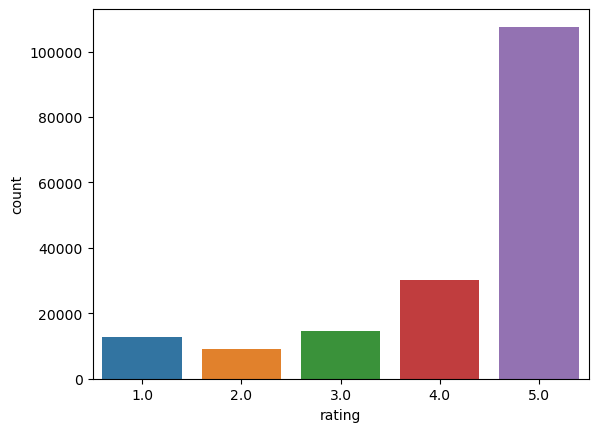

In [35]:
# the distribution of ratings 

sns.countplot(x='rating', data=dataset)

In [36]:
# the distribution of ratings

# The distribution of ratings is as follows:

# most of the ratings are 5

dataset['rating'].value_counts()

5.0    107593
4.0     30104
3.0     14593
1.0     12652
2.0      9182
Name: rating, dtype: int64

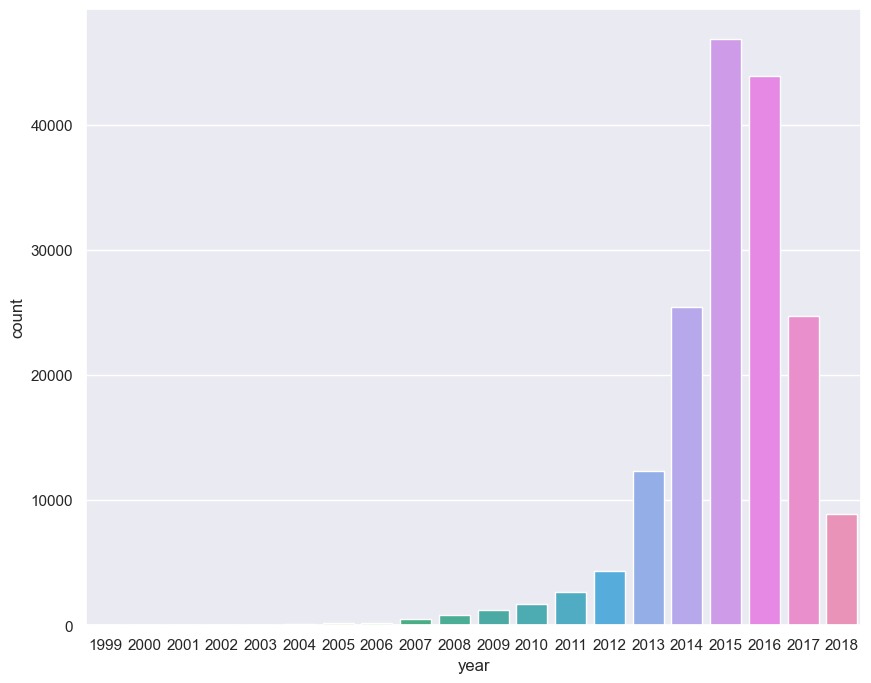

In [48]:
# the distribution of sales by year

sns.countplot(x='year', data=dataset)
sns.set(rc={'figure.figsize':(8,8)})

# the distribution of sales by year

# The distribution of sales by year is as follows:

# 2015 was the best year of sales

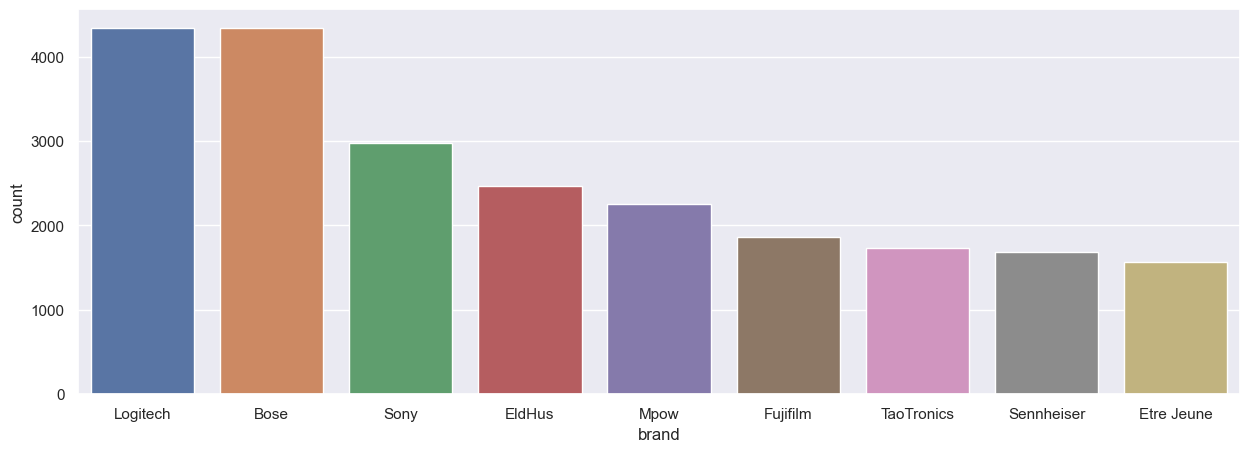

In [42]:
# brands with the most sales

sns.countplot(x='brand', data=dataset, order=dataset['brand'].value_counts().iloc[1:10].index)
sns.set(rc={'figure.figsize':(15,15)})

<Axes: xlabel='brand', ylabel='count'>

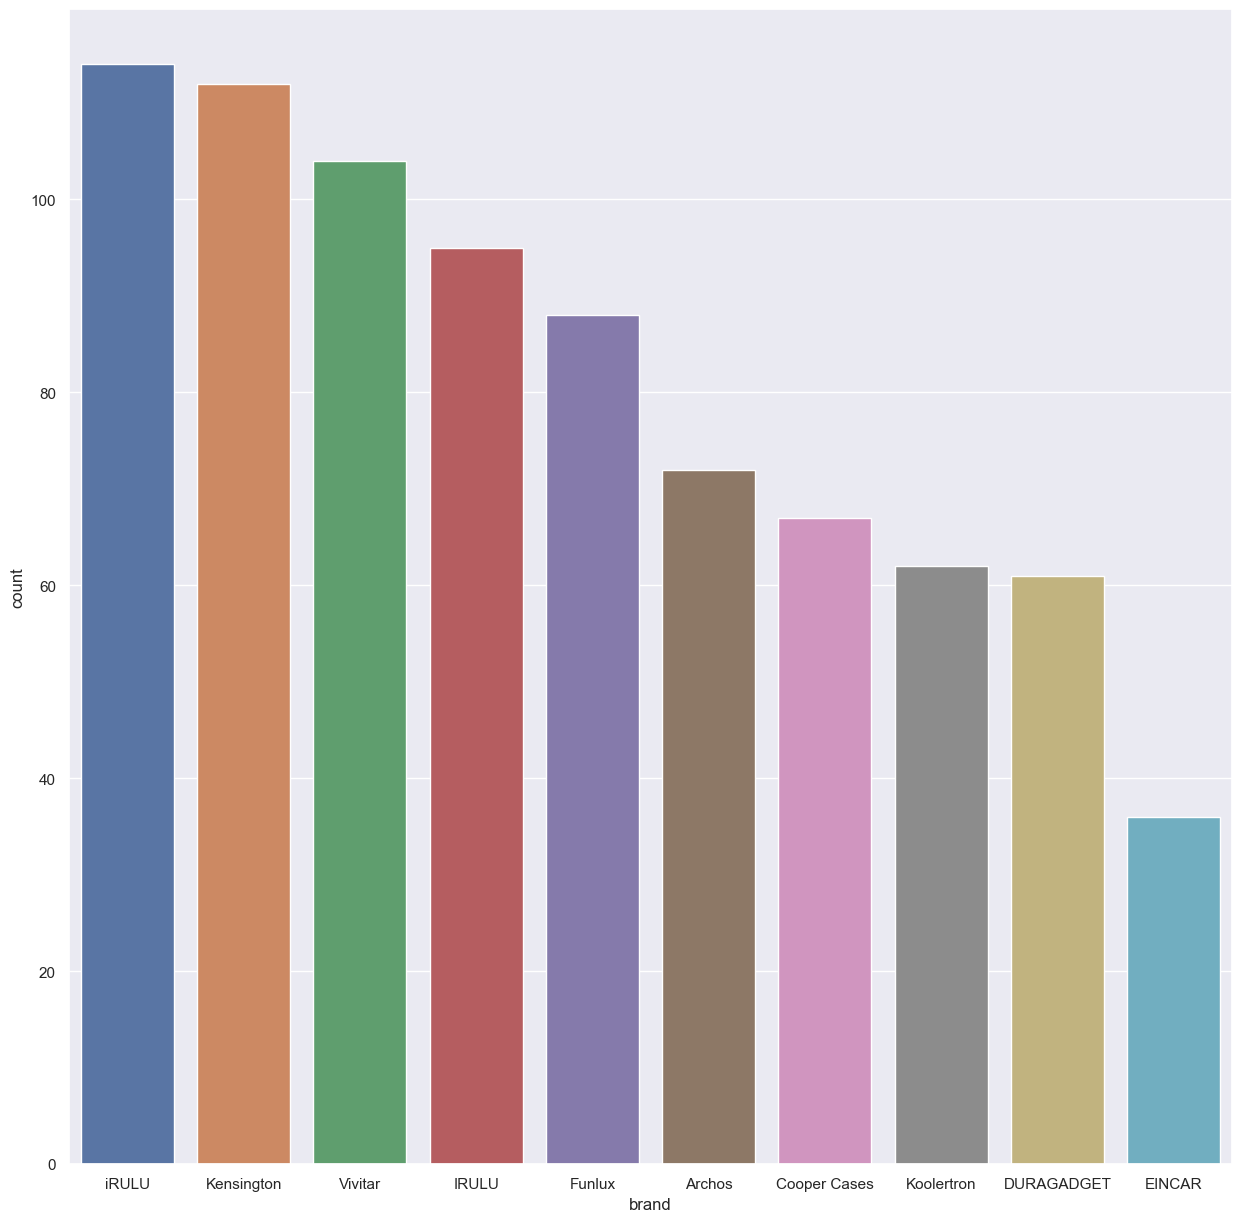

In [44]:
# What brand name sold the least?

sns.countplot(x='brand', data=dataset, order=dataset['brand'].value_counts().iloc[-10:].index)

In [49]:
# We can see that the brand name of EINCAR sold the least followed closely with DURAGADGET.

In [50]:
# Logitech & Bose had the most sales followed by Sony.

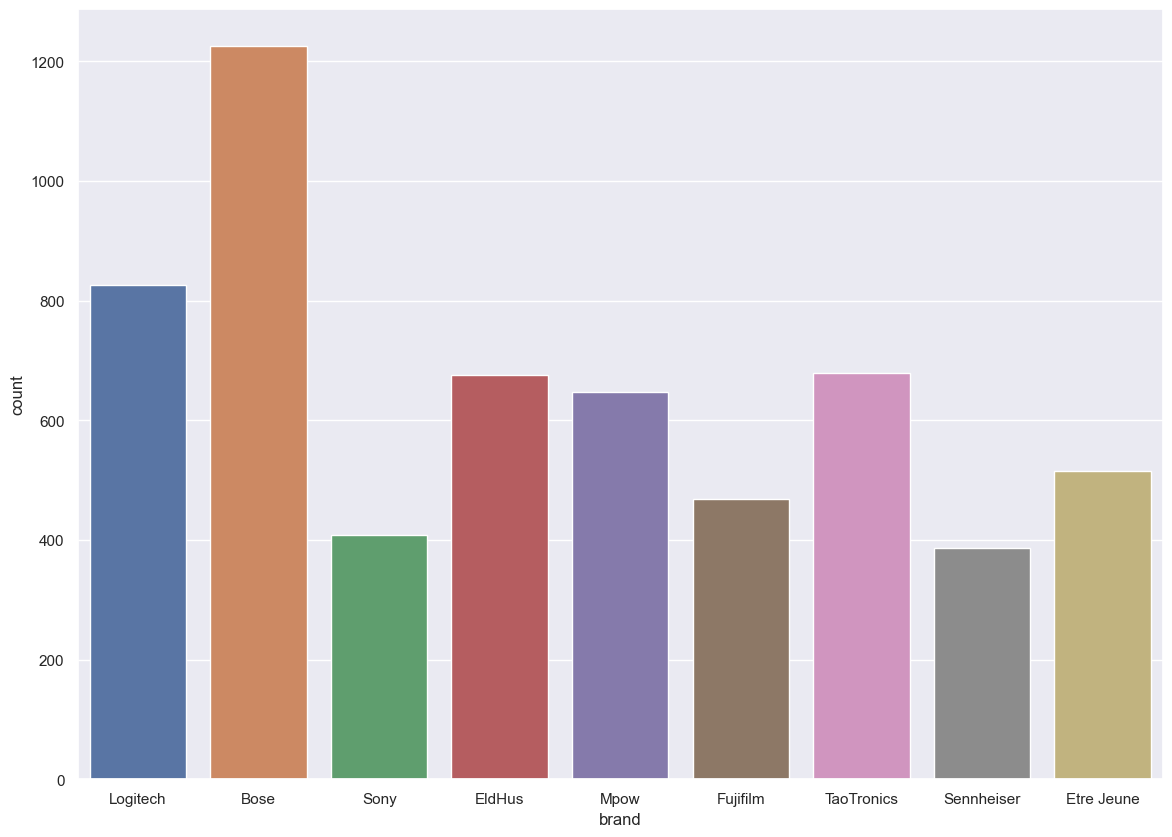

In [56]:
# brands with the most sales in 2016

sns.countplot(x='brand', data=dataset[dataset['year'] == 2016], order=dataset['brand'].value_counts().iloc[1:10].index)
sns.set(rc={'figure.figsize':(8,8)})

In [57]:
# in 2016 Bose overtook Logitech to have the most sales.

# TaoTronics had the third most sales that year

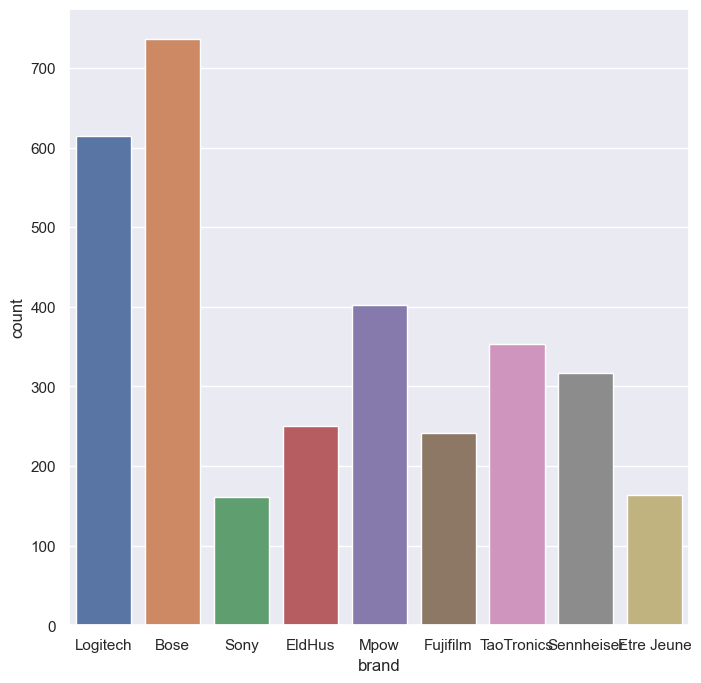

In [63]:
# brands with the most sales in 2017

sns.countplot(x='brand', data=dataset[dataset['year'] == 2017], order=dataset['brand'].value_counts().iloc[1:10].index)
sns.set(rc={'figure.figsize':(8,8)})


In [60]:
# the top 3 products sold in 2017 were Bose, Logitech and Mpow.

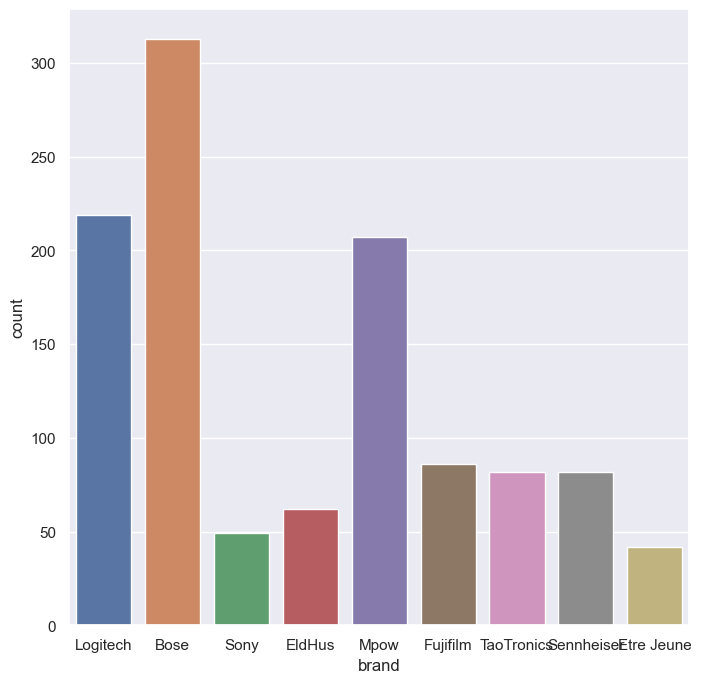

In [64]:
# brands with the most sales in 2018

sns.countplot(x='brand', data=dataset[dataset['year'] == 2018], order=dataset['brand'].value_counts().iloc[1:10].index)
sns.set(rc={'figure.figsize':(8,8)})

In [62]:
# For 2018, Bose was the most sold for a third year in a row followed by Logitech while Mpow was the third most sold.

<Axes: xlabel='month', ylabel='count'>

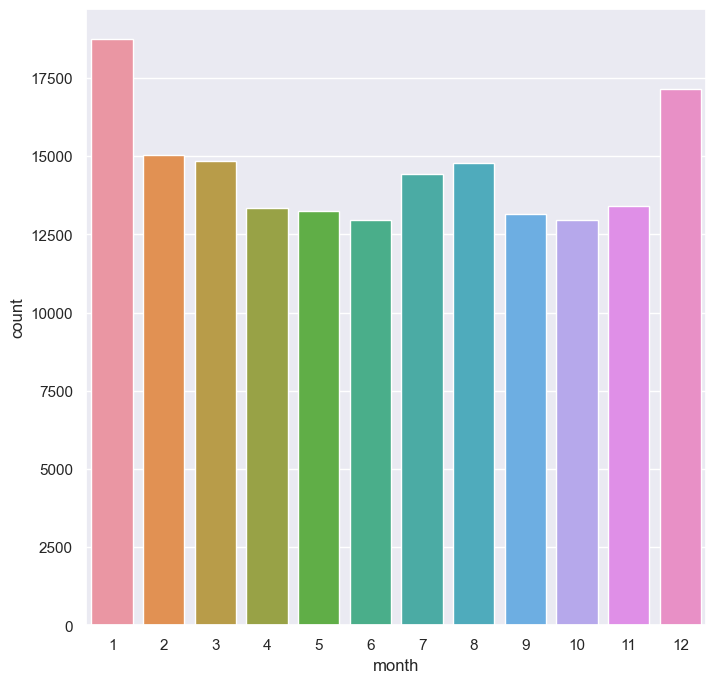

In [65]:
# month with most sales

sns.countplot(x='month', data=dataset)

In [66]:
# January[#1] was the month with the most sales

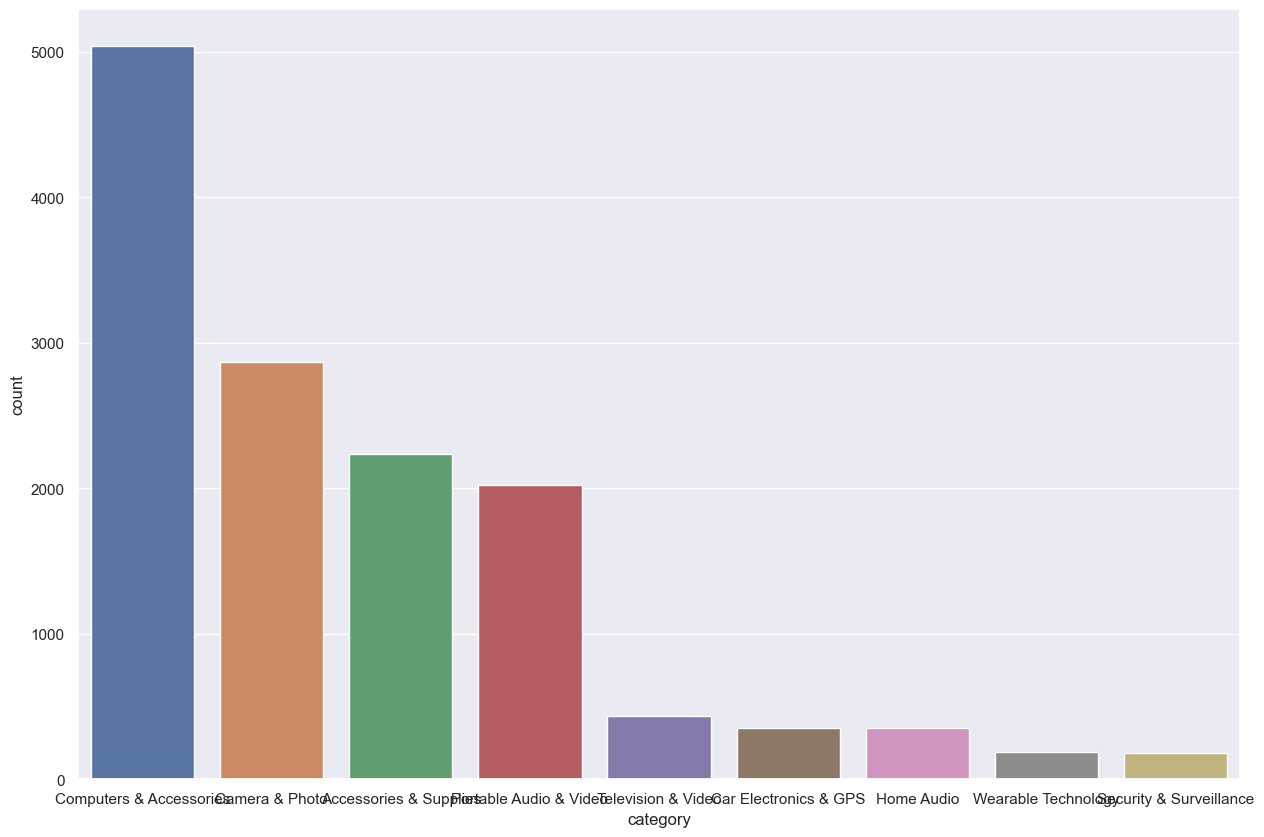

In [84]:
# What products by category were sold the most in January

sns.countplot(x='category', data=dataset[dataset['month'] == 1], order=dataset['category'].value_counts().iloc[1:10].index)
sns.set(rc={'figure.figsize':(10,15)})


In [85]:
# The top 3 products sold in January were Computers & Accesories, Camera & Photo and Accesories & Supplies.

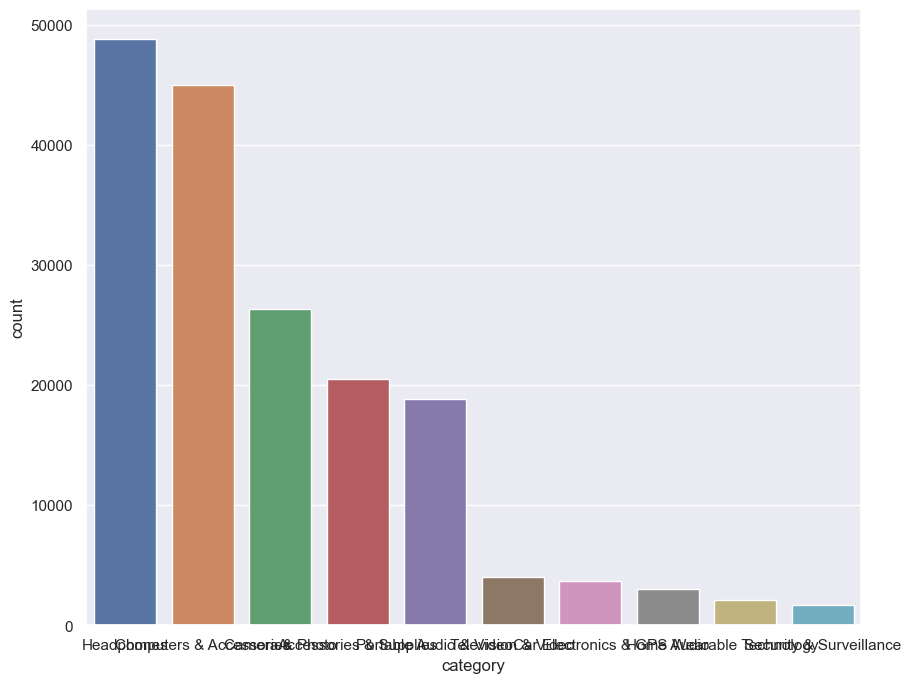

In [95]:
# Category with the least sales

sns.countplot(x='category', data=dataset, order=dataset['category'].value_counts().iloc[-10:].index)
sns.set(rc={'figure.figsize':(10,8)})

In [92]:
# The category with the least sales was Security & Surveillance while the most sales were Headphones.

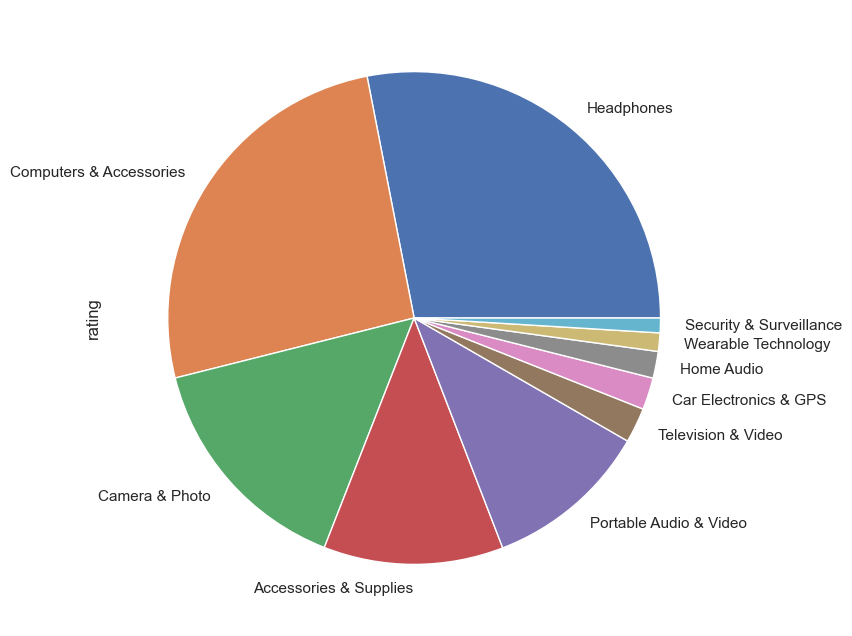

In [93]:
# distribution of sales presented in a pie chart

dataset['category'].value_counts(normalize=True)
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')

# white background

sns.set_style('white')

In [ ]:
# conclusion of our analysis

# We can see that the year 2015 had the best sales.

# The month of January had the best sales.

# We can see that the brands Bose and Logitech sold the most

# We can see that the category of Headphones sold the most.

# We can see that the brand name of EINCAR sold the least followed closely with DURAGADGET.

# We can see that the category of Security and Surveillance sold the least.